Bài 1. Hãy dùng hàm `groupby` để hiển thị trung bình lương (TotalPay) theo năm (Year).

In [1]:
import numpy as np
import pandas as pd

sal_df = pd.read_csv("../data/Salaries.csv")
sal_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
valueMeanOfJobTitle = sal_df.groupby('Year')['TotalPay'].mean()
print(valueMeanOfJobTitle)

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64


Bài 2. Hãy dùng hàm `groupby` để hiển thị tổng lương (TotalPay) theo năm. Sắp xếp theo thứ tự giảm dần.

In [3]:
totalPay = sal_df.groupby('Year')['TotalPay'].sum().sort_values(ascending = False)
print(totalPay)

Year
2013    2.918656e+09
2014    2.876911e+09
2012    2.724848e+09
2011    2.594195e+09
Name: TotalPay, dtype: float64


Bài 3. Hiển thị số lượng công việc khác nhau trong dataframe `sal_df`.

In [4]:
manyJob = sal_df['JobTitle'].unique()
print(len(manyJob))


2159


Bài 4. Điền giá trị 0.0 cho các ô trống trong `sal_df`.

In [5]:
# kt xem còn có giá trị NaN hay k?
sal_df.fillna(0.0)

print(sal_df.isna())

           Id  EmployeeName  JobTitle  BasePay  OvertimePay  OtherPay  \
0       False         False     False    False        False     False   
1       False         False     False    False        False     False   
2       False         False     False    False        False     False   
3       False         False     False    False        False     False   
4       False         False     False    False        False     False   
...       ...           ...       ...      ...          ...       ...   
148649  False         False     False    False        False     False   
148650  False         False     False     True         True      True   
148651  False         False     False     True         True      True   
148652  False         False     False     True         True      True   
148653  False         False     False    False        False     False   

        Benefits  TotalPay  TotalPayBenefits   Year  Notes  Agency  Status  
0           True     False             False  

Bài 5. Tìm tên nhân viên có mức lương cao

In [6]:
max_salary = sal_df['TotalPay'].max()
max_salary_employee = sal_df.loc[sal_df['TotalPay'] == max_salary, 'EmployeeName'].iloc[0]
print(max_salary_employee)

NATHANIEL FORD


Bài 6. Vẽ đồ thị dạng histogram của tiền lương ngoài giờ (OvertimePay).

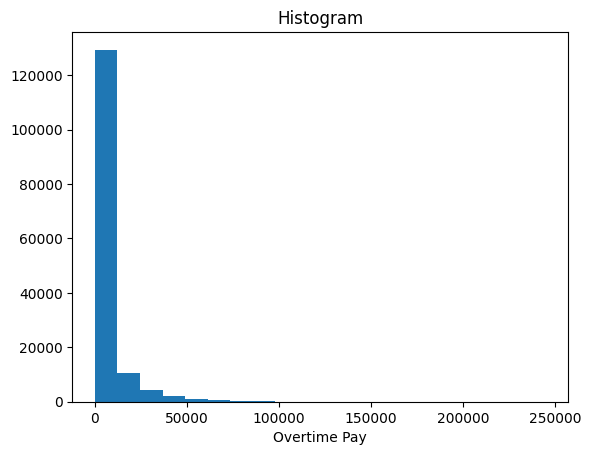

In [11]:
import matplotlib.pyplot as plt

# Vẽ đồ thị histogram của cột "OvertimePay"
plt.hist(sal_df['OvertimePay'], bins=20)
plt.xlabel('Overtime Pay')
plt.title('Histogram')
plt.show()

Bài 7. Hợp nhất 2 df từ 2 bảng `orders` và `customers` theo các `customer_id`.

In [41]:
orders = pd.read_csv("../data/orders.csv")
customers = pd.read_csv("../data/customers.csv")

# orders.head()
# customers.head()


# merged_df = orders.set_index('customer_id').join(customers.set_index('customer_id'))
# merged_df = orders.set_index('customer_id').join(customers.set_index('id'), rsuffix='_customer')
# merged_df = pd.merge(orders, customers, left_on='customer_id', right_on='id')


# merged_df

customers = customers.rename(columns={'id': 'customer_id'})
# customers.head()
merged_df = orders.join(customers.set_index('customer_id'), on='customer_id')
merged_df

,id,customer_id,product_id,delivery_country,name,billing_country
0,0,1866,686,India,Anangam Ramamuthe,India
1,1,1921,617,China,Tsung Xiang-ling,China
2,1,1921,54,Armenia,Tsung Xiang-ling,China
3,1,1921,566,China,Tsung Xiang-ling,China
4,1,1921,128,Lebanon,Tsung Xiang-ling,China
...,...,...,...,...,...,...
1995,997,1866,735,India,Anangam Ramamuthe,India
1996,997,1866,173,Serbia,Anangam Ramamuthe,India
1997,997,1866,990,India,Anangam Ramamuthe,India
1998,998,1431,830,Hungry,Marcin Oja,Hungry
